<a href="https://colab.research.google.com/github/guanyuq03/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Assignment%202/Econ_5200_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Phase 1: The Robustness Audit (Topic 4)<h1>

<h2>Step 1.1: The "Latency" Trap

In [2]:
# Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

<h2>Step 1.2: Manual MAD vs. SD

In [3]:
def calculate_mad(data):
    # 1. Calculate the Median of the data
    median = np.median(data)
    # 2. Calculate Absolute Deviations (|x - median|)
    abs_deviations = np.abs(data - median)
    # 3. Return the Median of those deviations
    mad = np.median(abs_deviations)
    return mad

In [4]:
sd = np.std(latency_logs)
mad = calculate_mad(latency_logs)

print(f"Standard Deviation: {sd}")
print(f"Median Absolute Deviation: {mad}")

Standard Deviation: 431.1336423894568
Median Absolute Deviation: 7.0


**Analysis**:
The standard deviation (SD) is "exploded" because it is based on squared deviations from the mean. Even though only 20 requests are extreme outliers, their very large latency values dominate the SD calculation and finally cause it to explode. Therefore, SD reflects rare tail events instead of typical system performance. By contrast, the MAD is based on the median and absolute deviations. This time, the extreme outliers have little effect on the median, because more than half of the observations are normal requests. In this case, the MAD captures the typical variability and remains stable.

<h1>Phase 2: The Probability Audit (Topic 5)

<h2>Step 2.1: The False Positive Paradox

In [5]:
def bayesian_audit(prior, sensitivity, specificity):
    # Calculate P(Flagged | Cheater)
    true_positive = sensitivity * prior

    # Calculate P(Flagged | Not Cheater)
    false_positive = (1 - specificity) * (1 - prior)

    # Calculate P(Cheater | Flagged)
    posterior = true_positive / (true_positive + false_positive)

    return posterior

In [6]:
sensitivity = 0.98
specificity = 0.98

# Test the scenarios
scenario_A = bayesian_audit(0.50, sensitivity, specificity)
scenario_B = bayesian_audit(0.05, sensitivity, specificity)
scenario_C = bayesian_audit(0.001, sensitivity, specificity)
# Print out the results
print(f"Scenario A: {scenario_A:.2%}")
print(f"Scenario B: {scenario_B:.2%}")
print(f"Scenario C: {scenario_C:.2%}")

Scenario A: 98.00%
Scenario B: 72.06%
Scenario C: 4.68%


<h1>Phase 3: The Bias Audit (Topic 6)

<h2>Step 3.1: Detecting Sample Ratio Mismatch (SRM)

In [7]:
# Observed counts from the experiment
observed = np.array([50250, 49750])

# Expected counts under a 50/50 split
total_users = observed.sum()
expected = np.array([total_users / 2, total_users / 2])

# Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
chi2 = np.sum((observed - expected)**2 / expected)

# Print out results
print("Observed counts:", observed)
print("Expected counts:", expected)
print("Chi-square statistic:", chi2)

# Decision rule
if chi2 > 3.84:
    print("Result: INVALID experiment due to engineering bias (p < 0.05)")
else:
    print("Result: VALID experiment")

Observed counts: [50250 49750]
Expected counts: [50000. 50000.]
Chi-square statistic: 2.5
Result: VALID experiment


<h1>Phase 4: AI Expansion (The Co-Pilot Era)

<h2>Task 4.1: The "Memecoin Graveyard" Simulation

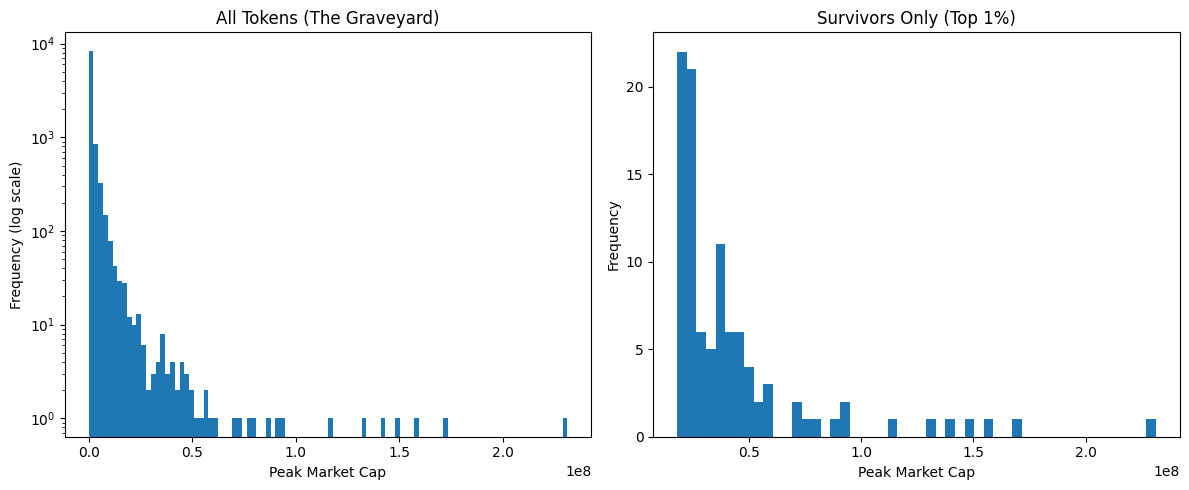

Mean Market Cap (All Tokens): 1740842.1056080002
Mean Market Cap (Survivors Only): 43633521.21568503


In [8]:
# ----------------------------
# (P) Prep: Financial DGP
# ----------------------------
np.random.seed(42)
n_tokens = 10_000

# ----------------------------
# (I) Iterate: Pareto (Power Law)
# 99% near zero, heavy right tail
# ----------------------------
# Pareto with shape > 1 gives extreme skew
pareto_shape = 1.5
market_caps = np.random.pareto(pareto_shape, n_tokens)

# Scale down so most tokens are effectively worthless
market_caps = market_caps * 1e6

# ----------------------------
# Create DataFrames
# ----------------------------
df_all = pd.DataFrame({
    "token_id": range(n_tokens),
    "peak_market_cap": market_caps
})

# Survivors = top 1%
threshold = np.percentile(df_all["peak_market_cap"], 99)
df_survivors = df_all[df_all["peak_market_cap"] >= threshold]

# ----------------------------
# (M) Mechanism: Visualization
# ----------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_all["peak_market_cap"], bins=100, log=True)
plt.title("All Tokens (The Graveyard)")
plt.xlabel("Peak Market Cap")
plt.ylabel("Frequency (log scale)")

plt.subplot(1, 2, 2)
plt.hist(df_survivors["peak_market_cap"], bins=50)
plt.title("Survivors Only (Top 1%)")
plt.xlabel("Peak Market Cap")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ----------------------------
# (E) Evaluate: Bias via Means
# ----------------------------
mean_all = df_all["peak_market_cap"].mean()
mean_survivors = df_survivors["peak_market_cap"].mean()

print("Mean Market Cap (All Tokens):", mean_all)
print("Mean Market Cap (Survivors Only):", mean_survivors)

<h2> Task 4.2: The Digital Portfolio

Please see the Github